In [2]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [3]:
# Where my json files are located
player_name = "Fred"
#player_name = "Emil"
#player_name = "Liam"
onlyfiles = [f for f in listdir(f"../{player_name}FaceitData/MatchStats") if isfile(join(f"../{player_name}FaceitData/MatchStats", f))]

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../FredFaceitData/MatchStats'

In [ ]:
#Rename columns
def rename_cols(text: str):
    text = text.split(".")[1]
    text = text.split(" ")
    text = "".join(list(map(str.capitalize, text)))
    return text

In [ ]:
def create_df_from_json():
    df = pd.DataFrame()
    for ID in onlyfiles:
        path = f"../{player_name}FaceitData/MatchStats/{ID}"
        #print(path)
        with open(path, "r") as file:
           obj = json.load(file)["items"]
           obj = pd.json_normalize(obj)
        obj = obj.rename(columns=rename_cols)
        df = pd.concat([df, obj], ignore_index=True)
    return df


In [ ]:
df_fred = create_df_from_json()

In [ ]:
# Create picklle file if there are large amounts of json files
df_fred.to_pickle(f"{player_name}Stats.pkl", compression="bz2")

In [4]:
df_fred = pd.read_pickle("FredStats.pkl", compression="bz2")

In [5]:
df_fred

,Map,UpdatedAt,MatchId,K/dRatio,SecondHalfScore,Rounds,K/rRatio,BestOf,CreatedAt,PlayerId,...,Kills,TripleKills,Winner,GameMode,Team,Game,Score,Assists,Mvps,FirstHalfScore
0,de_mirage,2023-08-30T19:25:23.79Z,1-f125eb81-9b0b-41a3-a095-1040cc60fe23,0.7,1,24,0.58,2,2023-08-30T19:25:23.79Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,14,0,34fb7aa1-240e-46a9-a0bd-436fd01b30a4,5v5,FistbumpsOnLan,csgo,8 / 16,1,1,7
1,de_vertigo,2023-08-22T16:56:32.453Z,1-5cb524de-af81-4076-b389-ded7aec6ffbb,1.05,5,29,0.79,2,2023-08-22T16:55:00.819Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,23,2,aa402ef6-e46c-4daf-9563-7d84a81f3041,5v5,team_TIMMO,csgo,13 / 16,1,2,8
2,de_nuke,2023-08-22T15:40:30.857Z,1-f3539b47-4c07-485c-9f44-84c1503a0ba9,0.9,8,29,0.66,2,2023-08-22T15:39:02.797Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,19,1,7aac5064-0a86-403a-b428-6a7f1e3e18a2,5v5,team_TIMMO,csgo,13 / 16,4,2,8
3,de_ancient,2023-08-19T15:57:42.247Z,1-e513661c-125c-45ec-9481-517c0f3bbf06,0.52,4,27,0.41,2,2023-08-19T15:56:11.756Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,11,0,8b9de44b-9c44-4ac8-a1f5-46d47d0c6469,5v5,team_sprayxd,csgo,16 / 11,2,1,7
4,de_vertigo,2023-08-18T01:45:19.543Z,1-e9b49a12-8fea-4c85-928e-ce66b8c8c06a,1,8,35,0.74,2,2023-08-18T01:43:47.496Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,26,1,d614ddba-25ca-4f10-bd79-8c3619610557,5v5,team_Jacooz,csgo,19 / 16,5,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,de_train,2020-10-26T22:45:43.361Z,1-cae7caa7-8517-4020-8315-135468be2d83,1.38,11,29,0.76,2,2020-10-26T22:44:13.309Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,22,1,3d94fc93-1a31-4517-9d74-ec48d482306b,5v5,team_STRAXZYY,csgo,13 / 16,6,2,5
1820,de_vertigo,2020-10-26T21:54:46.401Z,1-7be3a54f-4ba5-4066-a89e-a4e3bebbd37b,2.15,4,24,1.17,2,2020-10-26T21:53:16.424Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,28,1,3d94fc93-1a31-4517-9d74-ec48d482306b,5v5,team_STRAXZYY,csgo,8 / 16,0,6,12
1821,de_inferno,2020-10-26T20:04:15.1Z,1-527f7055-85fe-4a4b-84e6-e40d4456bd19,1.57,3,24,0.92,2,2020-10-26T20:02:45.861Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,22,3,2593bd46-1e15-4501-a8d4-673a56759bb6,5v5,team_oskayy,csgo,8 / 16,3,5,5
1822,de_mirage,2020-10-26T19:16:39.892Z,1-022b00a3-906c-496d-bee8-268037e73daf,0.8,2,25,0.64,2,2020-10-26T19:15:09.797Z,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,16,1,17b9faef-17fd-4a38-aacb-67a01cb913c9,5v5,team_-Shiiine,csgo,9 / 16,2,1,7


In [ ]:
#onlyfiles

In [6]:
# Put datatypes into df and cleansed df

type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
}

df_fred = df_fred.astype(type, errors="ignore")
df_fred.dropna(how="any", inplace=True)
df_fred['Score'] = df_fred['Score'].str.replace(" / ", ":")
df_fred = df_fred
#df_jj['Result'] = df_jj["Result"].astype(int).replace({1: "Win", 0: "Loss"})


In [7]:
# Clean CreateAt Column

df_fred['CreatedAt'] = df_fred['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_fred= df_fred[df_fred['CreatedAt'].str.len() > 22]


In [8]:

df_fred['CreatedAt'] = df_fred['CreatedAt'].astype("datetime64[ns]")
df_fred["DateOrdinal"] = df_fred['CreatedAt'].apply(lambda x: x.toordinal())


df_fred["Year"] = df_fred['CreatedAt'].dt.year
df_fred["Month"] = df_fred['CreatedAt'].dt.month
df_fred["Date"] = df_fred['CreatedAt'].dt.day

In [9]:

rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_fred = df_fred.replace({"Map": rename_all_maps})
df_fred.sort_values(by="CreatedAt", ascending=True, inplace=True)
df_fred = df_fred.groupby('Map').filter(lambda x: len(x)>3)


In [10]:
df_fred

,Map,UpdatedAt,MatchId,K/dRatio,SecondHalfScore,Rounds,K/rRatio,BestOf,CreatedAt,PlayerId,...,Team,Game,Score,Assists,Mvps,FirstHalfScore,DateOrdinal,Year,Month,Date
1022,Cache,2017-12-27T21:05:26.69Z,d340ffa6-529d-466a-bdbf-b46a1c37a41d,1.67,7,25,1.00,1,2017-12-27 21:03:47.554,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_ChintzyTie,csgo,9:16,6,5,9,736690,2017,12,27
1021,Cache,2017-12-27T22:34:11.464Z,c7a7ec94-7ff2-445b-8639-1a17f63f1d4f,2.62,3,21,1.00,1,2017-12-27 22:32:39.386,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team__Mariusz_,csgo,16:5,1,5,13,736690,2017,12,27
1020,Cache,2017-12-27T23:25:22.077Z,04196036-51ca-4227-b153-7c18019a171f,0.76,2,26,0.50,1,2017-12-27 23:23:52.067,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_GrimyRannarr,csgo,10:16,3,2,8,736690,2017,12,27
1018,Train,2017-12-28T16:31:09.362Z,ece8d60f-cede-4839-a9c7-307df36e2007,1.29,5,24,0.92,1,2017-12-28 16:29:32.852,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_livaska,csgo,16:8,1,4,11,736691,2017,12,28
1017,Nuke,2017-12-28T17:16:10.303Z,c7935762-648a-42a2-971c-1ddba2b88d49,0.20,3,26,0.19,1,2017-12-28 17:14:35.859,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_INO,csgo,16:10,7,0,7,736691,2017,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Ancient,2023-08-18T00:35:32.881Z,1-5dea5651-a0b6-4e83-92e8-6162efda15a4,1.00,6,42,0.74,2,2023-08-18 00:34:02.729,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_Kr0nos-,csgo,20:22,6,4,9,738750,2023,8,18
4,Vertigo,2023-08-18T01:45:19.543Z,1-e9b49a12-8fea-4c85-928e-ce66b8c8c06a,1.00,8,35,0.74,2,2023-08-18 01:43:47.496,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_Jacooz,csgo,19:16,5,4,7,738750,2023,8,18
3,Ancient,2023-08-19T15:57:42.247Z,1-e513661c-125c-45ec-9481-517c0f3bbf06,0.52,4,27,0.41,2,2023-08-19 15:56:11.756,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_sprayxd,csgo,16:11,2,1,7,738751,2023,8,19
2,Nuke,2023-08-22T15:40:30.857Z,1-f3539b47-4c07-485c-9f44-84c1503a0ba9,0.90,8,29,0.66,2,2023-08-22 15:39:02.797,563e4fbf-cbe4-4c1b-b8f4-ae8ecd0552d5,...,team_TIMMO,csgo,13:16,4,2,8,738754,2023,8,22


In [11]:
#Displaying JJ stats (My Own)

#Displaying Maps and Other stats

Maps_Stats_df_fred = (
    df_fred.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


C:\Users\local_ec22633\Temp\ipykernel_31948\2732933329.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_fred.groupby(by="Map").aggregate(


In [12]:
Maps_Stats_df_fred

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins
Map,,,,,,,,
Ancient,55,1077,234,1103,159,9.072727,46.200000,28
Anubis,10,180,45,206,25,9.000000,50.000000,4
Cache,98,1739,335,1809,250,6.765306,38.795918,56
Cobblestone,16,285,50,297,39,5.062500,27.000000,6
Dust2,62,1126,231,1254,152,9.048387,49.693548,23
Inferno,358,6832,1364,6646,996,8.768156,45.941341,188
Mirage,415,7752,1423,7774,1103,8.474699,45.383133,206
Nuke,154,3351,634,3051,519,9.974026,46.577922,84
Overpass,214,4363,843,4023,628,9.191589,44.831776,113


In [13]:
Maps_Stats_df_fred["Losses"] = (Maps_Stats_df_fred["Matches"] - Maps_Stats_df_fred["Wins"]).astype(int)
Maps_Stats_df_fred["Winrate%"] = (((Maps_Stats_df_fred["Wins"] / Maps_Stats_df_fred["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_fred["Headshots"] = (Maps_Stats_df_fred["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_fred["Headshots%"] = (Maps_Stats_df_fred["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_fred["Matches"].astype(int)
Maps_Stats_df_fred.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_fred

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Mirage,415,7752,1423,7774,1103,8.47,45.38,206,209,49.64
Inferno,358,6832,1364,6646,996,8.77,45.94,188,170,52.51
Overpass,214,4363,843,4023,628,9.19,44.83,113,101,52.80
Nuke,154,3351,634,3051,519,9.97,46.58,84,70,54.55
Train,130,2677,497,2473,398,8.80,42.89,76,54,58.46
Vertigo,110,2308,391,2082,353,10.00,47.87,60,50,54.55
Cache,98,1739,335,1809,250,6.77,38.80,56,42,57.14
Dust2,62,1126,231,1254,152,9.05,49.69,23,39,37.10
Ancient,55,1077,234,1103,159,9.07,46.20,28,27,50.91


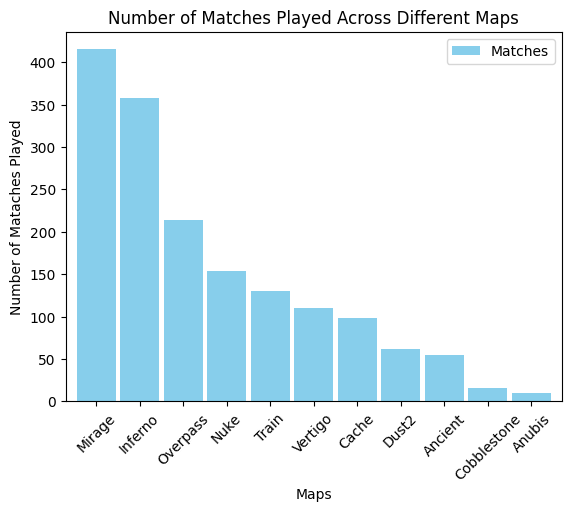

In [14]:

#Number of matches played across different maps
Maps_Stats_df_fred.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.show()
